In [1]:
import pandas as pd
import numpy as np

#경로 설정 후 지역-요일 배달 품목정보 데이터 불러오기
path = "C:/Users/bbiga/OneDrive/바탕 화면/학교생활/대학교1(세종대)/2학년/2학기/학술제/"
df = pd.read_csv(path + 'food_data_new.csv', encoding = 'cp949')

In [2]:
#필요한 컬럼들만 추출하여 분석하기
df = df[['식품명', '대표식품명', '식품대분류명', '식품중분류명', '영양성분함량기준량', '에너지(kcal)', '수분(g)', '단백질(g)',
       '지방(g)', '회분(g)', '탄수화물(g)', '당류(g)', '식이섬유(g)', '칼슘(mg)', '철(mg)',
       '인(mg)', '칼륨(mg)', '나트륨(mg)', '비타민 A(μg RAE)', '레티놀(μg)', '베타카로틴(μg)',
       '티아민(mg)', '리보플라빈(mg)', '니아신(mg)', '비타민 C(mg)', '비타민 D(μg)',
       '콜레스테롤(mg)', '포화지방산(g)', '트랜스지방산(g)']]

In [3]:
#영양성분함량기준량은 100g으로 책정, 아이스크림 및 액체류는 추천에 포함시키지 않음
df['영양성분함량기준량'].unique()

array(['100g', '100ml'], dtype=object)

In [4]:
remove = df[df['영양성분함량기준량'].str.contains('100ml')].index

In [5]:
df.drop(remove, inplace = True)
len(df)

1115

In [6]:
df.drop(['영양성분함량기준량'], axis = 1, inplace = True)
df.head()

,식품명,대표식품명,식품대분류명,식품중분류명,에너지(kcal),수분(g),단백질(g),지방(g),회분(g),탄수화물(g),...,레티놀(μg),베타카로틴(μg),티아민(mg),리보플라빈(mg),니아신(mg),비타민 C(mg),비타민 D(μg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g)
0,국밥_돼지머리,국밥,밥류,돼지머리,137,71.6,6.70,5.16,0.63,15.94,...,0.0,61.0,0.090,0.053,0.000,0.04,0.0,23.82,1.47,0.03
1,국밥_순대국밥,국밥,밥류,순대국밥,75,83.7,3.17,2.28,0.48,10.38,...,0.0,55.0,0.062,0.024,0.000,0.21,0.0,48.69,1.26,0.01
2,국밥_콩나물,국밥,밥류,콩나물,52,86.8,1.45,0.24,0.56,10.93,...,0.0,22.0,0.140,0.022,0.173,1.26,0.0,0.00,0.12,0.00
3,기장밥,기장밥,밥류,해당없음,166,59.1,3.44,0.57,0.15,36.77,...,0.0,0.0,0.000,0.005,0.205,0.29,0.0,0.00,0.08,0.00
4,김밥,김밥,밥류,해당없음,140,69.5,4.84,4.55,1.11,19.98,...,3.0,1318.0,0.157,0.043,0.674,3.76,0.0,19.30,1.10,0.02


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1115 entries, 0 to 1319
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   식품명            1115 non-null   object 
 1   대표식품명          1115 non-null   object 
 2   식품대분류명         1115 non-null   object 
 3   식품중분류명         1115 non-null   object 
 4   에너지(kcal)      1115 non-null   int64  
 5   수분(g)          1115 non-null   float64
 6   단백질(g)         1115 non-null   float64
 7   지방(g)          1115 non-null   float64
 8   회분(g)          868 non-null    float64
 9   탄수화물(g)        1115 non-null   float64
 10  당류(g)          1013 non-null   float64
 11  식이섬유(g)        852 non-null    float64
 12  칼슘(mg)         868 non-null    float64
 13  철(mg)          866 non-null    float64
 14  인(mg)          868 non-null    float64
 15  칼륨(mg)         867 non-null    float64
 16  나트륨(mg)        1114 non-null   float64
 17  비타민 A(μg RAE)  867 non-null    float64
 18  레티놀(μg) 

In [8]:
#나트륨이 na값인 데이터는 하나이다. 열무김치 종류이므로 분석에서 제외한다.
df = df.drop(1065, axis = 0)

In [9]:
df['식품대분류명'].unique()

array(['밥류', '빵 및 과자류', '면 및 만두류', '죽 및 스프류', '국 및 탕류', '찌개 및 전골류', '찜류',
       '구이류', '전·적 및 부침류', '볶음류', '조림류', '튀김류', '나물·숙채류', '생채·무침류',
       '곡류, 서류 제품', '김치류', '장아찌·절임류', '음료 및 차류', '수·조·어·육류'], dtype=object)

In [10]:
#나물.숙채류, 생채.무침류, 곡류.서류제품, 김치류, , 음료 및 차류 전체 제외
#수.조.어.육류(대구포, 북어포 제외), 장아찌.절임류(간장게장, 양념게장 제외)
remove = df[df['식품대분류명'].str.contains('나물·숙채류')].index
df = df.drop(remove)

In [11]:
remove = df[df['식품대분류명'].str.contains('생채·무침류')].index
df = df.drop(remove)

In [12]:
remove = df[df['식품대분류명'].str.contains('곡류, 서류 제품')].index
df = df.drop(remove)

In [13]:
remove = df[df['식품대분류명'].str.contains('김치류')].index
df = df.drop(remove)

In [14]:
df[df['식품대분류명'] == '수·조·어·육류']

,식품명,대표식품명,식품대분류명,식품중분류명,에너지(kcal),수분(g),단백질(g),지방(g),회분(g),탄수화물(g),...,레티놀(μg),베타카로틴(μg),티아민(mg),리보플라빈(mg),니아신(mg),비타민 C(mg),비타민 D(μg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g)
484,육회,육회,수·조·어·육류,해당없음,130,73.9,9.93,6.43,1.63,8.12,...,1.0,4.0,0.000,0.107,0.307,3.17,0.0,28.09,2.11,0.08
1316,대구포,대구포,수·조·어·육류,해당없음,141,56.4,31.97,0.40,8.92,2.33,...,0.0,0.0,0.065,0.068,0.963,0.00,NaN,107.15,0.17,0.00
1317,물회,물회,수·조·어·육류,해당없음,76,83.4,4.91,2.70,1.11,7.90,...,1.0,161.0,0.060,0.031,1.559,0.43,NaN,17.18,0.40,0.01
1318,물회_생선,물회,수·조·어·육류,생선,72,82.6,4.29,1.54,1.25,10.31,...,2.0,263.0,0.020,0.025,0.250,2.01,NaN,12.74,0.25,0.00
1319,북어포,북어포,수·조·어·육류,해당없음,332,12.0,77.11,1.95,7.34,1.59,...,17.0,0.0,0.000,0.232,1.785,0.00,NaN,425.12,0.66,0.00


In [15]:
df = df.drop([1316, 1319])

In [16]:
df[df['식품대분류명'] == '장아찌·절임류']

,식품명,대표식품명,식품대분류명,식품중분류명,에너지(kcal),수분(g),단백질(g),지방(g),회분(g),탄수화물(g),...,레티놀(μg),베타카로틴(μg),티아민(mg),리보플라빈(mg),니아신(mg),비타민 C(mg),비타민 D(μg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g)
457,가자미식해,가자미식해,장아찌·절임류,해당없음,134,69.3,11.09,4.81,3.16,11.64,...,8.0,1317.0,0.268,0.132,0.000,2.56,0.0,73.81,0.70,0.03
458,갈치젓_양념,갈치젓,장아찌·절임류,양념,149,53.8,15.53,5.08,15.33,10.28,...,413.0,897.0,7.311,0.178,0.000,0.00,0.0,112.27,1.87,0.03
459,꽃게장_간장,꽃게장,장아찌·절임류,간장,62,82.8,7.02,1.10,3.06,6.04,...,7.0,15.0,0.000,0.112,13.544,17.11,0.0,48.91,0.16,0.00
460,꽃게장_양념(고추가루),꽃게장,장아찌·절임류,양념(고추가루),97,73.1,10.23,0.61,3.52,12.61,...,0.0,628.0,0.000,0.150,13.585,22.05,0.0,46.16,0.24,0.01
461,단무지,단무지,장아찌·절임류,해당없음,13,95.6,0.33,0.20,1.53,2.40,...,0.0,0.0,0.000,0.000,0.000,3.13,0.0,0.00,0.03,0.00
462,더덕장아찌,더덕장아찌,장아찌·절임류,해당없음,141,62.0,4.47,0.89,3.77,28.90,...,0.0,596.0,0.289,0.044,0.767,2.12,0.0,0.00,0.23,0.00
463,매실장아찌_우메보시(일본),매실장아찌,장아찌·절임류,우메보시(일본),65,75.7,1.27,1.77,10.27,11.03,...,0.0,0.0,0.000,0.000,0.500,0.00,0.0,0.00,0.03,0.00
464,멸치젓_양념,멸치젓,장아찌·절임류,양념,90,63.2,11.40,1.60,16.40,7.40,...,32.0,268.0,0.000,0.200,0.000,2.40,0.0,117.60,0.80,0.00
465,무짠지,무짠지,장아찌·절임류,해당없음,11,91.0,0.54,0.12,6.34,1.98,...,0.0,0.0,0.000,0.020,0.040,0.00,0.0,0.00,0.02,0.00
466,무초절임(치킨무),무초절임(치킨무),장아찌·절임류,해당없음,17,95.4,0.52,0.30,0.71,3.05,...,0.0,0.0,0.000,0.000,0.000,0.00,0.0,0.00,0.02,0.00


In [17]:
ls = ['꽃게장']
dummy = df[df['대표식품명'].isin(ls)]

In [18]:
remove = df[df['식품대분류명'].str.contains('장아찌·절임류')].index
df = df.drop(remove)

In [19]:
df = pd.concat([df, dummy], axis = 0)
len(df)

904

In [20]:
#분석의 편이를 위해 식품대분류명이 빵 및 과자류인 데이터프레임 형성. 이후 분석에는 쓰이지 않음.
dummy = df[df['식품대분류명'] == '빵 및 과자류']

In [21]:
ls = ['샌드위치', '피자', '햄버거']
tmp = df[df['대표식품명'].isin(ls)]

In [22]:
remove = df[df['식품대분류명'].str.contains('빵 및 과자류')].index
df = df.drop(remove)

In [23]:
df = pd.concat([df, tmp], axis = 0)
len(df)

821

In [24]:
df.reset_index(inplace = True)

In [25]:
df = df.drop('index', axis = 1)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   식품명            821 non-null    object 
 1   대표식품명          821 non-null    object 
 2   식품대분류명         821 non-null    object 
 3   식품중분류명         821 non-null    object 
 4   에너지(kcal)      821 non-null    int64  
 5   수분(g)          821 non-null    float64
 6   단백질(g)         821 non-null    float64
 7   지방(g)          821 non-null    float64
 8   회분(g)          649 non-null    float64
 9   탄수화물(g)        821 non-null    float64
 10  당류(g)          753 non-null    float64
 11  식이섬유(g)        644 non-null    float64
 12  칼슘(mg)         649 non-null    float64
 13  철(mg)          649 non-null    float64
 14  인(mg)          649 non-null    float64
 15  칼륨(mg)         649 non-null    float64
 16  나트륨(mg)        821 non-null    float64
 17  비타민 A(μg RAE)  648 non-null    float64
 18  레티놀(μg)   

In [27]:
df.to_csv('food_preprocessing.csv')

수분을 기준으로 클러스터링(0 --> 국물 없음, 1 --> 국물 있음) 이에 대해 국물 없음, 국물 있음이 아닌 다른 기준으로 라벨링을 할 필요가 있음.

NULL값에 대한 전처리 진행하기

In [28]:
nutrient_names = df.columns[4:]

nullArray = df[nutrient_names[0]].isnull()
for tag in nutrient_names:
  nullArray |= df[tag].isnull()

has_null_data = df[nullArray]
has_null_data

,식품명,대표식품명,식품대분류명,식품중분류명,에너지(kcal),수분(g),단백질(g),지방(g),회분(g),탄수화물(g),...,레티놀(μg),베타카로틴(μg),티아민(mg),리보플라빈(mg),니아신(mg),비타민 C(mg),비타민 D(μg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g)
56,초밥_한치,초밥,밥류,한치,150,61.6,5.48,0.34,1.43,31.17,...,0.0,3.0,0.001,0.016,0.578,2.59,NaN,40.03,0.18,0.00
265,국밥_돼지고기,국밥,밥류,돼지고기,76,84.7,5.53,3.22,0.36,6.23,...,0.0,34.0,0.043,0.034,0.428,0.00,NaN,11.88,0.70,0.02
341,국밥_굴,국밥,밥류,굴,105,76.1,6.52,2.74,1.05,13.60,...,15.0,164.0,0.049,0.094,0.412,0.00,NaN,79.75,0.60,0.02
343,초밥_(삼삼한밥상(Ⅶ))채소 초밥,초밥,밥류,해당없음,140,0.0,2.71,0.49,NaN,31.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,0.00
344,군만두_(눈치떡)군만두,군만두,면 및 만두류,해당없음,293,0.0,8.89,17.78,NaN,24.44,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.11,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,피자_불고기피자,피자,빵 및 과자류,불고기피자,253,45.3,13.70,8.35,2.05,30.60,...,42.0,68.0,0.305,0.135,0.270,1.28,NaN,22.85,4.65,0.20
816,피자_치즈피자,피자,빵 및 과자류,치즈피자,277,38.5,15.70,7.90,2.25,35.60,...,60.0,86.0,0.100,0.135,0.085,0.19,NaN,24.02,5.75,0.20
817,피자_페퍼로니피자,피자,빵 및 과자류,페퍼로니피자,266,40.6,14.70,7.40,2.20,35.15,...,56.0,106.0,0.185,0.140,0.445,1.60,NaN,20.87,5.45,0.20
818,피자_포테이토피자,피자,빵 및 과자류,포테이토피자,251,48.0,11.20,10.20,1.92,28.64,...,37.0,84.0,0.200,0.100,0.224,0.83,NaN,19.58,4.12,0.12


In [29]:
# column_name 별 평균값 구하기
def getMeanDf(column_name):
  tags = df[column_name].unique()
  mean_dict = {'index': tags,
               'count': []}

  for name in nutrient_names:
    mean_dict[name] = []

  for tag in tags:
    tag_data = df[df[column_name] == tag][nutrient_names]
    mean_dict['count'].append(len(tag_data))
    for name in nutrient_names:
      notnull_data = tag_data[tag_data[name].notnull()][name]
      mean_dict[name].append(np.round(np.mean(notnull_data), 2))

  return pd.DataFrame(mean_dict)

# tag를 빠르게 찾을 수 있는 해시 맵 반환
def getIndexTable(column_name):
  tags = df[column_name].unique()

  table = {}
  for index, tag in enumerate(tags):
    table[tag] = index
  return table

In [30]:
# 대표식품명 별 평균치 구하기
mean_table = getMeanDf('대표식품명')
index_table = getIndexTable('대표식품명')

In [31]:
# 식품대분류명 별 평균치 구하기
big_mean_table = getMeanDf('식품대분류명')
big_index_table = getIndexTable('식품대분류명')

In [32]:
# null 값 대표식품명 별 평균으로 바꾸기
# 대표식품 개수가 1개 -> 대표식품명 평균 == NaN -> 식품대분류 평균;

for i in has_null_data.index:
  for tag in nutrient_names[4:]:
    if np.isnan(df.loc[i, tag]):
      field = has_null_data.loc[i, '대표식품명']
      value = mean_table.loc[index_table[field], tag]
      if np.isnan(value):
        field = has_null_data.loc[i, '식품대분류명']
        value = big_mean_table.loc[big_index_table[field], tag]

      df.loc[i, tag] = value
df

,식품명,대표식품명,식품대분류명,식품중분류명,에너지(kcal),수분(g),단백질(g),지방(g),회분(g),탄수화물(g),...,레티놀(μg),베타카로틴(μg),티아민(mg),리보플라빈(mg),니아신(mg),비타민 C(mg),비타민 D(μg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g)
0,국밥_돼지머리,국밥,밥류,돼지머리,137,71.6,6.70,5.16,0.63,15.94,...,0.0,61.0,0.090,0.053,0.000,0.04,0.0,23.82,1.47,0.03
1,국밥_순대국밥,국밥,밥류,순대국밥,75,83.7,3.17,2.28,0.48,10.38,...,0.0,55.0,0.062,0.024,0.000,0.21,0.0,48.69,1.26,0.01
2,국밥_콩나물,국밥,밥류,콩나물,52,86.8,1.45,0.24,0.56,10.93,...,0.0,22.0,0.140,0.022,0.173,1.26,0.0,0.00,0.12,0.00
3,기장밥,기장밥,밥류,해당없음,166,59.1,3.44,0.57,0.15,36.77,...,0.0,0.0,0.000,0.005,0.205,0.29,0.0,0.00,0.08,0.00
4,김밥,김밥,밥류,해당없음,140,69.5,4.84,4.55,1.11,19.98,...,3.0,1318.0,0.157,0.043,0.674,3.76,0.0,19.30,1.10,0.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,피자_치즈피자,피자,빵 및 과자류,치즈피자,277,38.5,15.70,7.90,2.25,35.60,...,60.0,86.0,0.100,0.135,0.085,0.19,0.0,24.02,5.75,0.20
817,피자_페퍼로니피자,피자,빵 및 과자류,페퍼로니피자,266,40.6,14.70,7.40,2.20,35.15,...,56.0,106.0,0.185,0.140,0.445,1.60,0.0,20.87,5.45,0.20
818,피자_포테이토피자,피자,빵 및 과자류,포테이토피자,251,48.0,11.20,10.20,1.92,28.64,...,37.0,84.0,0.200,0.100,0.224,0.83,0.0,19.58,4.12,0.12
819,햄버거_소고기패티,햄버거,빵 및 과자류,소고기패티,271,41.3,11.94,8.94,2.06,35.76,...,0.0,326.0,0.107,0.092,1.635,0.53,0.0,14.77,4.21,0.33


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 821 entries, 0 to 820
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   식품명            821 non-null    object 
 1   대표식품명          821 non-null    object 
 2   식품대분류명         821 non-null    object 
 3   식품중분류명         821 non-null    object 
 4   에너지(kcal)      821 non-null    int64  
 5   수분(g)          821 non-null    float64
 6   단백질(g)         821 non-null    float64
 7   지방(g)          821 non-null    float64
 8   회분(g)          821 non-null    float64
 9   탄수화물(g)        821 non-null    float64
 10  당류(g)          821 non-null    float64
 11  식이섬유(g)        821 non-null    float64
 12  칼슘(mg)         821 non-null    float64
 13  철(mg)          821 non-null    float64
 14  인(mg)          821 non-null    float64
 15  칼륨(mg)         821 non-null    float64
 16  나트륨(mg)        821 non-null    float64
 17  비타민 A(μg RAE)  821 non-null    float64
 18  레티놀(μg)   

클러스터링 시작

In [34]:
df_preprocess = df

In [35]:
df_train = df_preprocess.drop(['식품명', '대표식품명', '식품대분류명', '식품중분류명'], axis = 1)

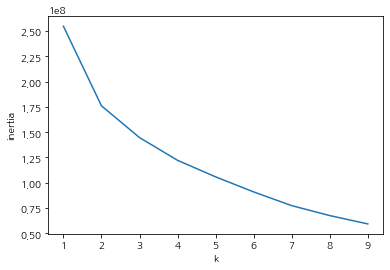

In [36]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 10) : 
    km = KMeans(n_clusters = k, random_state = 42)
    km.fit(df_train)
    inertia.append(km.inertia_)
    
plt.plot(range(1, 10), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [37]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 7).fit(df_train)
reduced_X = pca.transform(df_train)

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

km = KMeans(init = 'k-means++', n_clusters = 5, random_state = 42)
km.fit(reduced_X)
y_pred = km.labels_

print(sum(y_pred == 0))
print(sum(y_pred == 1))
print(sum(y_pred == 2))
print(sum(y_pred == 3))
print(sum(y_pred == 4))

444
11
262
98
6


In [38]:
from scipy.cluster.hierarchy import linkage, dendrogram

z = linkage(df_train, 'ward')
z

array([[3.94000000e+02, 3.95000000e+02, 0.00000000e+00, 2.00000000e+00],
       [3.96000000e+02, 3.97000000e+02, 0.00000000e+00, 2.00000000e+00],
       [3.98000000e+02, 3.99000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.63500000e+03, 1.63700000e+03, 6.90615548e+03, 8.04000000e+02],
       [1.63200000e+03, 1.63600000e+03, 7.16276955e+03, 1.70000000e+01],
       [1.63800000e+03, 1.63900000e+03, 1.25154336e+04, 8.21000000e+02]])

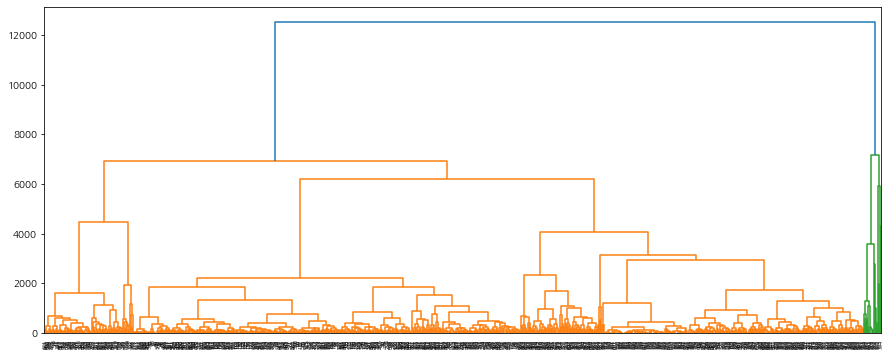

In [39]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.cluster.hierarchy import linkage, dendrogram

z = linkage(df_train, 'ward')

plt.figure(figsize = (15,6))
ax = plt.subplot()

ddata = dendrogram(z)

In [40]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_scaled = ss.fit_transform(df_train)

In [41]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 5, min_samples = 6)
clusters = dbscan.fit_predict(df_scaled)

clusters

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
       -1,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0, -1,
        0, -1,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0, -1, -1, -1,  0,
        0,  0,  0,  0, -1

모든 컬럼을 기준으로 clustering을 진행하기에는 무리가 있다고 판단. 주요 컬럼들을 가지고 클러스터링을 진행하자.

In [42]:
#에너지, 수분, 단백질, 지방, 탄수화물, 당류, 나트륨
df_train.columns

Index(['에너지(kcal)', '수분(g)', '단백질(g)', '지방(g)', '회분(g)', '탄수화물(g)', '당류(g)',
       '식이섬유(g)', '칼슘(mg)', '철(mg)', '인(mg)', '칼륨(mg)', '나트륨(mg)',
       '비타민 A(μg RAE)', '레티놀(μg)', '베타카로틴(μg)', '티아민(mg)', '리보플라빈(mg)',
       '니아신(mg)', '비타민 C(mg)', '비타민 D(μg)', '콜레스테롤(mg)', '포화지방산(g)',
       '트랜스지방산(g)'],
      dtype='object')

In [43]:
df_select = df_train[['수분(g)', '단백질(g)', '지방(g)', '탄수화물(g)', '나트륨(mg)', '당류(g)']]

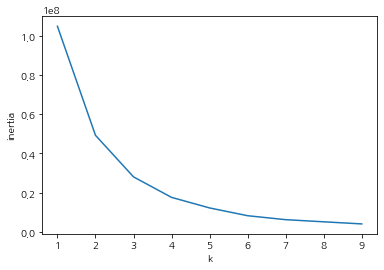

In [44]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(1, 10) : 
    km = KMeans(n_clusters = k, random_state = 42)
    km.fit(df_select)
    inertia.append(km.inertia_)
    
plt.plot(range(1, 10), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()

In [45]:
from sklearn import decomposition

pca = decomposition.PCA(n_components = 6).fit(df_select)
reduced_X = pca.transform(df_select)

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

km = KMeans(init = 'k-means++', n_clusters = 9, random_state = 42)
km.fit(reduced_X)
y_pred = km.labels_

print(sum(y_pred == 0))
print(sum(y_pred == 1))
print(sum(y_pred == 2))
print(sum(y_pred == 3))
print(sum(y_pred == 4))
print(sum(y_pred == 5))
print(sum(y_pred == 6))
print(sum(y_pred == 7))
print(sum(y_pred == 8))

143
6
86
1
18
292
46
2
227


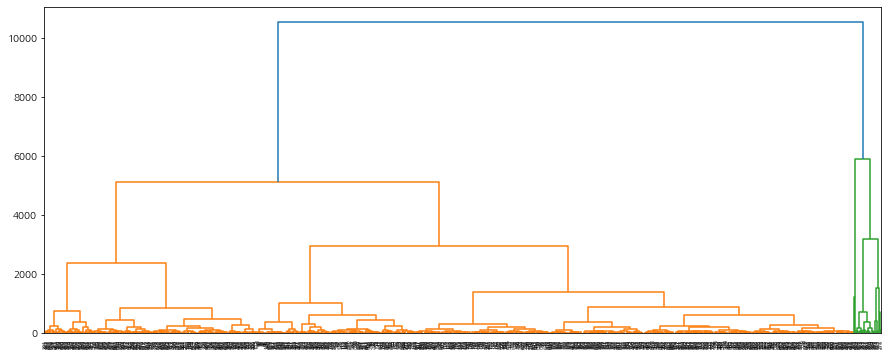

In [46]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.cluster.hierarchy import linkage, dendrogram

z = linkage(df_select, 'ward')

plt.figure(figsize = (15,6))
ax = plt.subplot()

ddata = dendrogram(z)

In [47]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
df_scaled = ss.fit_transform(df_train)

In [48]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps = 1)
clusters = dbscan.fit_predict(df_scaled)

clusters

array([ 0,  0,  0,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  1,
       -1, -1, -1, -1, -1,  0,  1,  1, -1, -1,  0, -1, -1, -1,  0,  1, -1,
       -1, -1, -1,  0, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0, -1, -1, -1,
       -1, -1,  0,  0, -1, -1, -1, -1, -1,  0,  0,  0, -1, -1, -1,  0,  0,
       -1, -1, -1,  0,  0,  0,  0, -1,  0,  0, -1, -1,  0,  0,  0, -1, -1,
        0, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0,  0,  0, -1, -1,  0,  0, -1, -1,  0,  0, -1,  0,
       -1,  0,  0,  0,  0,  0, -1,  0, -1, -1, -1, -1,  0,  0,  0, -1, -1,
        0, -1,  0,  0, -1, -1,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1,  0,  0, -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1

In [49]:
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

pca = decomposition.PCA(n_components = 6).fit(df_scaled)
reduced_X = pca.transform(df_scaled)

km = KMeans(init = 'k-means++', n_clusters = 9, random_state =  42)
km.fit(reduced_X)
y_pred = km.labels_

print(sum(y_pred == 0))
print(sum(y_pred == 1))
print(sum(y_pred == 2))
print(sum(y_pred == 3))
print(sum(y_pred == 4))
print(sum(y_pred == 5))
print(sum(y_pred == 6))
print(sum(y_pred == 7))
print(sum(y_pred == 8))

255
61
183
3
13
134
4
73
95


In [50]:
df['label_kmeans'] = y_pred

In [51]:
list(df[df['label_kmeans'] == 8]['식품명'])

['김치찌개_꽁치',
 '김치찌개_돼지고기',
 '동태찌개',
 '오리백숙',
 '오리탕',
 '달걀찜_우유',
 '닭찜',
 '사태찜_쇠고기',
 '수육_쇠고기',
 '코다리찜',
 '가자미구이',
 '갈치구이_기름',
 '닭구이',
 '닭발구이',
 '삼치구이',
 '새우구이',
 '스테이크_소안심',
 '조기구이',
 '함박스테이크',
 '가지전',
 '달걀말이',
 '달걀부침(달걀후라이)',
 '두부부침',
 '버섯전_표고버섯',
 '산적_돼지고기',
 '스크램블드에그',
 '완자전_돼지고기',
 '완자전_쇠고기',
 '완자전_참치',
 '완자전_해물',
 '닭발볶음',
 '닭볶음',
 '돼지고기볶음_김치',
 '돼지고기볶음_채소',
 '쇠고기볶음_버섯',
 '고등어조림',
 '닭볶음탕',
 '닭조림',
 '병어조림',
 '삼치조림',
 '오징어조림',
 '장조림_달걀',
 '장조림_메추리알',
 '장조림_쇠고기_메추리알',
 '달걀찜_(삼삼한밥상(Ⅶ))토마토 채소 계란찜',
 '두부찜_(삼삼한밥상(Ⅶ))닭가슴살 두부선',
 '보쌈/수육_(삼삼한밥상(Ⅶ))돈수육 & 해물냉채',
 '두부구이_(삼삼한밥상(Ⅶ))두부구이 & 버섯소스',
 '달걀말이_(삼삼한밥상(Ⅶ))일본식 계란말이',
 '닭튀김_(고피자)치킨텐더',
 '닭튀김_(삼삼한밥상(Ⅶ))유린기',
 '스파게티_해물_크림소스',
 '매운탕_광어',
 '매운탕_조기',
 '선짓국',
 '매운탕_우럭',
 '오리백숙_한방',
 '갈비찜_고춧가루',
 '꼬막찜_참꼬막',
 '달걀_수란_중탕',
 '도미찜',
 '병어찜',
 '북어찜',
 '숙회_문어',
 '오징어순대',
 '조기찜',
 '도미구이',
 '불고기_삼겹살_오징어',
 '황태구이',
 '굴전',
 '깻잎전',
 '꼬치구치_낙지',
 '두부전',
 '버섯전',
 '생선전_가자미',
 '생성전_동태',
 '소라산적',
 '스크램블에그',
 '오징어산적',
 '완자전_쇠고기(동그랑땡/육원전)',
 '채소전',
 '홍합산적',
 '화양적',
 '난자완

In [52]:
from sklearn.cluster import AgglomerativeClustering

pca = decomposition.PCA(n_components = 6).fit(df_scaled)
reduced_X = pca.transform(df_scaled)

ac = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage = 'ward')
ac.fit(reduced_X)

labels = ac.labels_

In [53]:
sum(labels == 0)
sum(labels == 1)
sum(labels == 2)
sum(labels == 3)
sum(labels == 4)
sum(labels == 5)
sum(labels == 6)
sum(labels == 7)
sum(labels == 8)

3

In [54]:
df['label_hierachy'] = labels

In [55]:
list(df[df['label_hierachy'] == 8]['식품명'])

['김치찌개_돼지고기', '동태찌개', '선짓국']

### KMeans로 분류한 클러스터 중 한쪽에 과도하게 집결된 클러스터에 대해 재클러스터링 진행

진행 후 클러스터 라벨에 각각 숫자를 더해 다른 클러스터임을 보이기

In [56]:
renew_df_kmeans = pd.DataFrame()

In [57]:
renew_df_kmeans = pd.concat([renew_df_kmeans,df[df['label_kmeans'] == 1]])

In [58]:
renew_df_kmeans = pd.concat([renew_df_kmeans,df[df['label_kmeans'] == 4]])

In [59]:
renew_df_kmeans = pd.concat([renew_df_kmeans,df[df['label_kmeans'] == 3]])

In [60]:
renew_df_kmeans = pd.concat([renew_df_kmeans,df[df['label_kmeans'] == 6]])

In [61]:
renew_df_kmeans.loc[renew_df_kmeans['label_kmeans'] == 1, 'label_kmeans'] = 0
renew_df_kmeans.loc[renew_df_kmeans['label_kmeans'] == 4, 'label_kmeans'] = 1
renew_df_kmeans.loc[renew_df_kmeans['label_kmeans'] == 6, 'label_kmeans'] = 2

In [62]:
df['label_kmeans'].value_counts()

0    255
2    183
5    134
8     95
7     73
1     61
4     13
6      4
3      3
Name: label_kmeans, dtype: int64

In [63]:
#0,2,5,8 <- 클러스터링 5개, 7 <- 클러스터링 3개만

df_cluster = df[df['label_kmeans'] == 7]

#### 7번 클러스터부터 시작

In [64]:
df_cluster7 = df_cluster[['수분(g)', '단백질(g)', '지방(g)', '탄수화물(g)', '나트륨(mg)', '당류(g)']]
df_cluster7.head()

,수분(g),단백질(g),지방(g),탄수화물(g),나트륨(mg),당류(g)
4,69.5,4.84,4.55,19.98,307.0,0.00
10,63.8,4.60,3.65,26.65,309.0,0.14
12,61.9,4.88,4.41,27.52,327.0,0.09
20,56.6,6.62,11.28,24.23,318.0,0.17
27,68.9,6.86,4.32,18.84,232.0,0.05


In [65]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df_cluster7)
df_cluster7_scaled = ss.transform(df_cluster7)

In [66]:
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

pca = decomposition.PCA(n_components = 6).fit(df_cluster7_scaled)
reduced_X = pca.transform(df_cluster7_scaled)

km = KMeans(init = 'k-means++', n_clusters = 3, random_state = 42)
km.fit(reduced_X)
y_pred = km.labels_

In [67]:
print(sum(y_pred == 0))
print(sum(y_pred == 1))
print(sum(y_pred == 2))

18
25
30


In [68]:
df_cluster['label_kmeans'] = y_pred + 100

C:\Users\bbiga\anaconda3\envs\leblanc\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
renew_df_kmeans = pd.concat([renew_df_kmeans, df_cluster])

다음으로 0,2,5,8에 대한 재클러스터링 진행

In [70]:
#0번 클러스터는 255개의 항목을 가지고 있었음
df_cluster = df[df['label_kmeans'] == 0]

In [71]:
df_cluster0 = df_cluster[['수분(g)', '단백질(g)', '지방(g)', '탄수화물(g)', '나트륨(mg)', '당류(g)']]

In [72]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df_cluster0)
df_cluster0_scaled = ss.transform(df_cluster0)

In [73]:
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

pca = decomposition.PCA(n_components = 6).fit(df_cluster0_scaled)
reduced_X = pca.transform(df_cluster0_scaled)

km = KMeans(init = 'k-means++', n_clusters = 9, random_state = 42)
km.fit(reduced_X)
y_pred = km.labels_

In [74]:
print(sum(y_pred == 0))
print(sum(y_pred == 1))
print(sum(y_pred == 2))
print(sum(y_pred == 3))
print(sum(y_pred == 4))
print(sum(y_pred == 5))
print(sum(y_pred == 6))
print(sum(y_pred == 7))
print(sum(y_pred == 8))

24
47
46
10
11
55
19
24
19


In [75]:
df_cluster['label_kmeans'] = y_pred + 200
renew_df_kmeans = pd.concat([renew_df_kmeans, df_cluster])
renew_df_kmeans['label_kmeans'].unique()

C:\Users\bbiga\anaconda3\envs\leblanc\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([  0,   1,   3,   2, 100, 102, 101, 201, 206, 205, 204, 207, 208,
       200, 202, 203])

In [76]:
#2번 클러스터는 원래 183개의 항목을 가지고 있었음

df_cluster = df[df['label_kmeans'] == 2]
df_cluster2 = df_cluster[['수분(g)', '단백질(g)', '지방(g)', '탄수화물(g)', '나트륨(mg)', '당류(g)']]

In [77]:
from sklearn.preprocessing import StandardScaler

ss.fit(df_cluster2)
df_cluster2_scaled = ss.transform(df_cluster2)

In [78]:
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

pca = decomposition.PCA(n_components = 6).fit(df_cluster2_scaled)
reduced_X = pca.transform(df_cluster2_scaled)

km = KMeans(init = 'k-means++', n_clusters = 7, random_state = 42)
km.fit(reduced_X)
y_pred = km.labels_

In [79]:
print(sum(y_pred == 0))
print(sum(y_pred == 1))
print(sum(y_pred == 2))
print(sum(y_pred == 3))
print(sum(y_pred == 4))
print(sum(y_pred == 5))
print(sum(y_pred == 6))

4
35
33
24
19
10
58


In [80]:
df_cluster['label_kmeans'] = y_pred + 300
renew_df_kmeans = pd.concat([renew_df_kmeans, df_cluster])
renew_df_kmeans['label_kmeans'].unique()

C:\Users\bbiga\anaconda3\envs\leblanc\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([  0,   1,   3,   2, 100, 102, 101, 201, 206, 205, 204, 207, 208,
       200, 202, 203, 301, 304, 306, 300, 303, 305, 302])

In [81]:
#5번 클러스터는 원래 134개의 항목을 가지고 있었음

df_cluster = df[df['label_kmeans'] == 5]
df_cluster5 = df_cluster[['수분(g)', '단백질(g)', '지방(g)', '탄수화물(g)', '나트륨(mg)', '당류(g)']]

In [82]:
from sklearn.preprocessing import StandardScaler

ss.fit(df_cluster5)
df_cluster5_scaled = ss.transform(df_cluster5)

In [83]:
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

pca = decomposition.PCA(n_components = 6).fit(df_cluster5_scaled)
reduced_X = pca.transform(df_cluster5_scaled)

km = KMeans(init = 'k-means++', n_clusters = 5, random_state = 42)
km.fit(df_cluster5_scaled)
y_pred = km.labels_

In [84]:
#5-1번 클러스터 다시 확인해보기
print(sum(y_pred == 0))
print(sum(y_pred == 1))
print(sum(y_pred == 2))
print(sum(y_pred == 3))
print(sum(y_pred == 4))

18
95
12
3
6


In [85]:
df_cluster['label_kmeans'] = y_pred + 400
renew_df_kmeans = pd.concat([renew_df_kmeans, df_cluster])
renew_df_kmeans['label_kmeans'].unique()

C:\Users\bbiga\anaconda3\envs\leblanc\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([  0,   1,   3,   2, 100, 102, 101, 201, 206, 205, 204, 207, 208,
       200, 202, 203, 301, 304, 306, 300, 303, 305, 302, 400, 402, 403,
       401, 404])

In [86]:
#8번 클러스터는 원래 95개의 항목을 가지고 있었음

df_cluster = df[df['label_kmeans'] == 8]
df_cluster8 = df_cluster[['수분(g)', '단백질(g)', '지방(g)', '탄수화물(g)', '나트륨(mg)', '당류(g)']]

from sklearn.preprocessing import StandardScaler

ss.fit(df_cluster8)
df_cluster8_scaled = ss.transform(df_cluster8)

In [87]:
from sklearn import decomposition
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

pca = decomposition.PCA(n_components = 6).fit(df_cluster8_scaled)
reduced_X = pca.transform(df_cluster8_scaled)

km = KMeans(init = 'k-means++', n_clusters = 5, random_state = 42)
km.fit(df_cluster8_scaled)
y_pred = km.labels_

In [88]:
print(sum(y_pred == 0))
print(sum(y_pred == 1))
print(sum(y_pred == 2))
print(sum(y_pred == 3))
print(sum(y_pred == 4))

24
27
21
16
7


In [89]:
df_cluster['label_kmeans'] = y_pred + 500
renew_df_kmeans = pd.concat([renew_df_kmeans, df_cluster])
renew_df_kmeans['label_kmeans'].unique()

C:\Users\bbiga\anaconda3\envs\leblanc\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([  0,   1,   3,   2, 100, 102, 101, 201, 206, 205, 204, 207, 208,
       200, 202, 203, 301, 304, 306, 300, 303, 305, 302, 400, 402, 403,
       401, 404, 501, 502, 500, 503, 504])

In [90]:
reset_cluster_number = {'label_kmeans' : {100 : 4, 101 : 5, 102 : 6, 200 : 7, 201 : 8, 202 : 9, 203 : 10, 204 : 11, 205 : 12, 206 : 13,
                                          207 : 14, 208 : 15, 300 : 16, 301 : 17, 302 : 18, 303 : 19, 304 : 20, 305 : 21, 306 : 22,
                                          400 : 23, 401 : 24, 402 : 25, 403 : 26, 404 : 27, 500 : 28, 501 : 29, 502 : 30, 503 : 31,
                                          504 : 32}}

In [91]:
renew_df_kmeans = renew_df_kmeans.replace(reset_cluster_number)

In [92]:
renew_df_kmeans.reset_index(inplace = True)
renew_df_kmeans.drop(['index'], axis = 1, inplace = True)

In [93]:
renew_df_kmeans.columns

Index(['식품명', '대표식품명', '식품대분류명', '식품중분류명', '에너지(kcal)', '수분(g)', '단백질(g)',
       '지방(g)', '회분(g)', '탄수화물(g)', '당류(g)', '식이섬유(g)', '칼슘(mg)', '철(mg)',
       '인(mg)', '칼륨(mg)', '나트륨(mg)', '비타민 A(μg RAE)', '레티놀(μg)', '베타카로틴(μg)',
       '티아민(mg)', '리보플라빈(mg)', '니아신(mg)', '비타민 C(mg)', '비타민 D(μg)',
       '콜레스테롤(mg)', '포화지방산(g)', '트랜스지방산(g)', 'label_kmeans', 'label_hierachy'],
      dtype='object')

In [94]:
renew_df_kmeans[['식품명', '대표식품명', '식품대분류명', '식품중분류명', 'label_kmeans']].to_csv('renew_labeling_of_kmeans.csv')

### 지금까지는 kmeans에 대한 재클러스터링이었다. hierarchy clustering에 대해서도 재클러스터링을 진행

In [95]:
renew_df_hierarchy = pd.DataFrame()

In [96]:
renew_df_hierarchy = pd.concat([renew_df_hierarchy,df[df['label_hierachy'] == 1]])
renew_df_hierarchy = pd.concat([renew_df_hierarchy,df[df['label_hierachy'] == 3]])
renew_df_hierarchy = pd.concat([renew_df_hierarchy,df[df['label_hierachy'] == 7]])
renew_df_hierarchy = pd.concat([renew_df_hierarchy,df[df['label_hierachy'] == 8]])
renew_df_hierarchy = pd.concat([renew_df_hierarchy,df[df['label_hierachy'] == 5]])

In [97]:
renew_df_hierarchy.loc[renew_df_hierarchy['label_hierachy'] == 1, 'label_hierachy'] = 0
renew_df_hierarchy.loc[renew_df_hierarchy['label_hierachy'] == 3, 'label_hierachy'] = 1
renew_df_hierarchy.loc[renew_df_hierarchy['label_hierachy'] == 7, 'label_hierachy'] = 2
renew_df_hierarchy.loc[renew_df_hierarchy['label_hierachy'] == 8, 'label_hierachy'] = 3
renew_df_hierarchy.loc[renew_df_hierarchy['label_hierachy'] == 5, 'label_hierachy'] = 4

In [98]:
df['label_hierachy'].value_counts()

2    249
6    228
0    170
4    144
1     13
3      7
7      4
8      3
5      3
Name: label_hierachy, dtype: int64

hierachy clustering의 재클러스터링의 대상이 되는 라벨은 2,6,0,4이다. 이에 대해 각각 재클러스터링을 진행

In [99]:
#2는 249개의 항목을 가지고 있었음

df_cluster = df[df['label_hierachy'] == 2]
df_cluster2 = df_cluster[['수분(g)', '단백질(g)', '지방(g)', '탄수화물(g)', '나트륨(mg)', '당류(g)']]

In [100]:
from sklearn.preprocessing import StandardScaler

ss.fit(df_cluster2)
df_cluster2_scaled = ss.transform(df_cluster2)

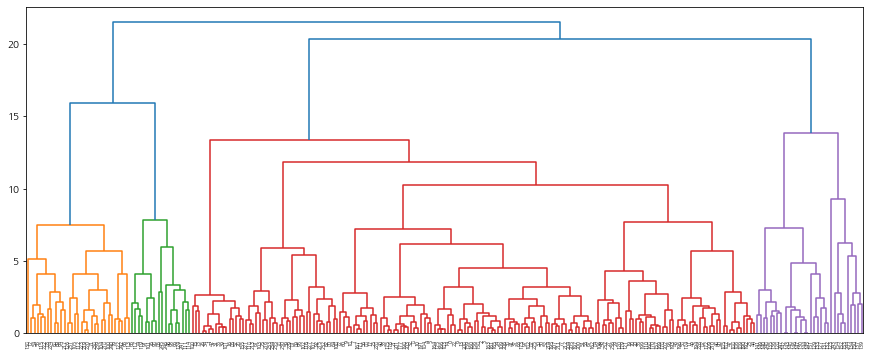

In [101]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.cluster.hierarchy import linkage, dendrogram

z = linkage(df_cluster2_scaled, 'ward')

plt.figure(figsize = (15,6))
ax = plt.subplot()

ddata = dendrogram(z)

In [102]:
from sklearn.cluster import AgglomerativeClustering

pca = decomposition.PCA(n_components = 6).fit(df_cluster2_scaled)
reduced_X = pca.transform(df_cluster2_scaled)

ac = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
ac.fit(reduced_X)

labels = ac.labels_

In [103]:
std_df = pd.DataFrame(df_cluster2_scaled, index=df_cluster2.index, columns=df_cluster2.columns)
data = std_df
data.head()

,수분(g),단백질(g),지방(g),탄수화물(g),나트륨(mg),당류(g)
0,0.422951,0.323573,0.322312,-0.298012,-0.889169,-0.861492
3,-0.088346,-0.704277,-1.125583,1.791377,-2.013454,-0.940582
4,0.337054,-0.262869,0.129890,0.107227,-0.102169,-0.940582
5,0.406590,-0.433127,-0.034142,0.025979,0.160164,-0.797231
6,-0.059713,0.134398,0.038411,0.977890,-0.152137,-0.233716


In [104]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(data.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,1.704165,0.282887,0.282887
pca2,1.236210,0.205208,0.488094
pca3,1.086897,0.180422,0.668516
pca4,0.793498,0.131718,0.800235
pca5,0.634812,0.105377,0.905612
pca6,0.568612,0.094388,1.000000


2번 클러스터에 대한 PCA n_conponets의 적절한 값은 4이다. 이를 이용하여 pca를 다시 한 번 진행

In [105]:
from sklearn.cluster import AgglomerativeClustering

pca = decomposition.PCA(n_components = 4).fit(df_cluster2_scaled)
reduced_X = pca.transform(df_cluster2_scaled)

ac = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
ac.fit(reduced_X)

labels = ac.labels_

In [106]:
print(sum(labels == 0))
print(sum(labels == 1))
print(sum(labels == 2))
print(sum(labels == 3))
print(sum(labels == 4))
print(sum(labels == 5))
print(sum(labels == 6))

122
36
10
26
21
33
1


In [107]:
df_cluster['label_hierarchy'] = labels

C:\Users\bbiga\anaconda3\envs\leblanc\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
list(df_cluster[df_cluster['label_hierarchy'] == 3]['식품명'])

['비빔밥_육회',
 '국수_막국수',
 '국수_쟁반막국수',
 '초밥_한치',
 '깻잎찜',
 '풋고추찜',
 '버섯구이_새송이',
 '부추전',
 '김치볶음',
 '낙지볶음',
 '마늘쫑볶음',
 '마늘쫑볶음_멸치',
 '버섯볶음_느타리',
 '잡채_콩나물',
 '감자조림',
 '무조림',
 '양미리조림',
 '탕수육_새우',
 '감자조림_(삼삼한밥상(Ⅶ))곤약 감자조림',
 '초밥_농어',
 '초밥_문어',
 '초밥_새우',
 '초밥_연어',
 '고추조림',
 '식혜',
 '꽃게장_양념(고추가루)']

In [109]:
df_cluster['label_hierachy'] = labels + 100
renew_df_hierarchy = pd.concat([renew_df_hierarchy, df_cluster])
renew_df_hierarchy['label_hierachy'].unique()

C:\Users\bbiga\anaconda3\envs\leblanc\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([  0,   1,   2,   3,   4, 100, 105, 101, 103, 106, 104, 102],
      dtype=int64)

In [110]:
#6은 224개의 항목을 가지고 있었음

df_cluster = df[df['label_hierachy'] == 6]
df_cluster6 = df_cluster[['수분(g)', '단백질(g)', '지방(g)', '탄수화물(g)', '나트륨(mg)', '당류(g)']]

In [111]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df_cluster6)
df_cluster6_scaled = ss.transform(df_cluster6)

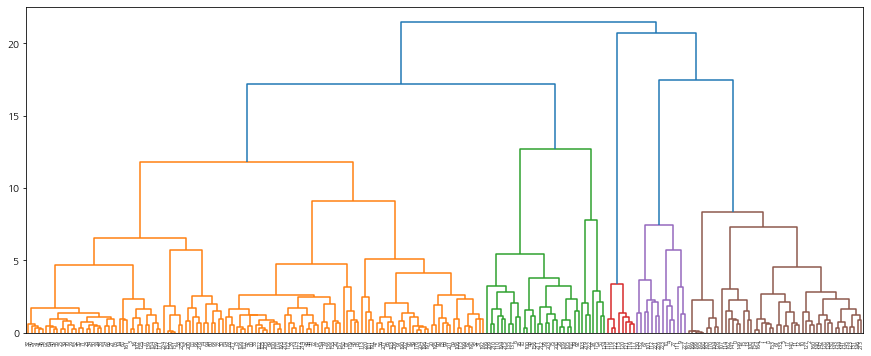

In [112]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.cluster.hierarchy import dendrogram, linkage

z = linkage(df_cluster6_scaled, 'ward')

plt.figure(figsize = (15,6))
ax = plt.subplot()

ddata = dendrogram(z)

In [113]:
from sklearn import decomposition
from sklearn.cluster import AgglomerativeClustering

pca = decomposition.PCA(n_components = 6).fit(df_cluster6_scaled)
reduced_X = pca.transform(df_cluster6_scaled)

ac = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage = 'ward')
ac.fit(reduced_X)

labels = ac.labels_

In [114]:
std_df = pd.DataFrame(df_cluster6_scaled, index=df_cluster6.index, columns=df_cluster6.columns)
data = std_df
data.head()

,수분(g),단백질(g),지방(g),탄수화물(g),나트륨(mg),당류(g)
1,-0.131536,-0.095016,0.714520,1.232142,-0.943297,-0.372755
2,0.049233,-0.665812,-0.874699,1.357528,-0.557473,-0.520259
39,-0.184017,-0.085061,0.028974,1.521671,-0.037449,0.642418
54,0.171690,-0.506521,-0.679942,0.700957,-0.188424,-0.485552
57,0.031739,-0.496565,-0.563088,1.216183,-0.649736,3.401607


In [115]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(data.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,1.568268,0.260232,0.260232
pca2,1.213063,0.201291,0.461522
pca3,1.135834,0.188475,0.649997
pca4,0.855087,0.141890,0.791887
pca5,0.671746,0.111467,0.903354
pca6,0.582432,0.096646,1.000000


6번 클러스터에 대한 적절한 pca n_componets 값은 4이다. 이를 이용하여 재클러스터링 진행

In [116]:
from sklearn import decomposition
from sklearn.cluster import AgglomerativeClustering

pca = decomposition.PCA(n_components = 4).fit(df_cluster6_scaled)
reduced_X = pca.transform(df_cluster6_scaled)

ac = AgglomerativeClustering(n_clusters = 9, affinity = 'euclidean', linkage = 'ward')
ac.fit(reduced_X)

labels = ac.labels_

In [117]:
print(sum(labels == 0))
print(sum(labels == 1))
print(sum(labels == 2))
print(sum(labels == 3))
print(sum(labels == 4))
print(sum(labels == 5))
print(sum(labels == 6))
print(sum(labels == 7))
print(sum(labels == 8))

50
35
19
40
8
8
7
36
25


In [118]:
df_cluster['label_hierarchy'] = labels

C:\Users\bbiga\anaconda3\envs\leblanc\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
list(df_cluster[df_cluster['label_hierarchy'] == 2]['식품명'])

['국밥_콩나물',
 '닭죽',
 '미역국_새우',
 '재첩국',
 '감자_찐감자',
 '누룽지_뜨거운물첨가',
 '미음',
 '미음_칠분도미',
 '미음_현미',
 '참깨죽',
 '현미죽',
 '흰죽(쌀죽)',
 '흰죽(쌀죽)_삼광',
 '흰죽(쌀죽)_새일미',
 '흰죽(쌀죽)_신동진',
 '흰죽(쌀죽)_오대',
 '흰죽(쌀죽)_칠분도미',
 '액상커피_커피가루_설탕(중량2.7g)',
 '액상커피_커피가루(중량1g)']

In [120]:
df_cluster['label_hierachy'] = labels + 200
renew_df_hierarchy = pd.concat([renew_df_hierarchy, df_cluster])
renew_df_hierarchy['label_hierachy'].unique()

C:\Users\bbiga\anaconda3\envs\leblanc\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([  0,   1,   2,   3,   4, 100, 105, 101, 103, 106, 104, 102, 200,
       202, 204, 201, 203, 208, 207, 206, 205], dtype=int64)

In [121]:
#4는 163개의 항목을 가지고 있었음

df_cluster = df[df['label_hierachy'] == 4]
df_cluster4 = df_cluster[['수분(g)', '단백질(g)', '지방(g)', '탄수화물(g)', '나트륨(mg)', '당류(g)']]

In [122]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df_cluster4)
df_cluster4_scaled = ss.transform(df_cluster4)

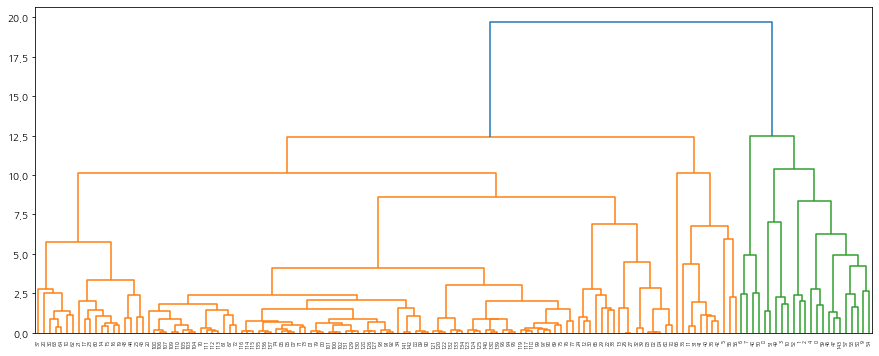

In [123]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.cluster.hierarchy import dendrogram, linkage

z = linkage(df_cluster4_scaled, 'ward')

plt.figure(figsize = (15,6))
ax = plt.subplot()

ddata = dendrogram(z)

In [124]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import decomposition

pca = decomposition.PCA(n_components = 6).fit(df_cluster4_scaled)
reduced_X = pca.transform(df_cluster4_scaled)

ac = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
ac.fit(reduced_X)

labels = ac.labels_

In [125]:
std_df = pd.DataFrame(df_cluster4_scaled, index=df_cluster4.index, columns=df_cluster4.columns)
data = std_df
data.head()

,수분(g),단백질(g),지방(g),탄수화물(g),나트륨(mg),당류(g)
21,3.211658,-0.990706,-0.076668,-1.859554,0.472230,2.148485
182,3.023521,-1.652520,-2.030324,0.256516,-1.871406,2.729087
233,2.356978,-1.425871,-0.338903,0.701738,-1.479102,2.236889
267,1.539925,-1.389608,-1.671935,3.366747,-0.551837,-0.699569
285,2.883762,0.648416,0.275165,-2.497032,0.900198,1.147365


In [126]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(data.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,1.970510,0.326138,0.326138
pca2,1.307260,0.216364,0.542501
pca3,0.978371,0.161929,0.704431
pca4,0.862694,0.142784,0.847215
pca5,0.481470,0.079688,0.926902
pca6,0.441654,0.073098,1.000000


4번 클러스터에 대한 적절한 pca n_componets 값은 4이다. 이를 이용하여 재클러스터링 진행

In [127]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import decomposition

pca = decomposition.PCA(n_components = 4).fit(df_cluster4_scaled)
reduced_X = pca.transform(df_cluster4_scaled)

ac = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
ac.fit(reduced_X)

labels = ac.labels_

In [128]:
print(sum(labels == 0))
print(sum(labels == 1))
print(sum(labels == 2))
print(sum(labels == 3))
print(sum(labels == 4))
print(sum(labels == 5))
print(sum(labels == 6))

90
5
14
3
14
8
10


In [129]:
df_cluster['label_hierarchy'] = labels

C:\Users\bbiga\anaconda3\envs\leblanc\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [130]:
list(df_cluster[df_cluster['label_hierarchy'] == 6]['식품명'])

['땅콩조림',
 '군만두_(눈치떡)군만두',
 '잡채_(삼삼한밥상(Ⅶ))유부 우엉 잡채',
 '게맛살튀김_(꾸브라꼬 숯불두마리 치킨)게살튀김',
 '삼치튀김_(삼삼한밥상(Ⅶ))삼치튀김 & 타르타르소스',
 '새우튀김_(꾸브라꼬 숯불두마리 치킨)새우링튀김',
 '치즈_(고피자)치즈스틱',
 '치즈_(꾸브라꼬 숯불두마리 치킨)치즈스틱',
 '치즈_(눈치떡)치즈스틱',
 '미꾸라지튀김']

In [131]:
df_cluster['label_hierachy'] = labels + 300
renew_df_hierarchy = pd.concat([renew_df_hierarchy, df_cluster])
renew_df_hierarchy['label_hierachy'].unique()

C:\Users\bbiga\anaconda3\envs\leblanc\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([  0,   1,   2,   3,   4, 100, 105, 101, 103, 106, 104, 102, 200,
       202, 204, 201, 203, 208, 207, 206, 205, 302, 305, 306, 303, 301,
       300, 304], dtype=int64)

In [132]:
#0은 157개의 항목을 가지고 있었음

df_cluster = df[df['label_hierachy'] == 0]
df_cluster0 = df_cluster[['수분(g)', '단백질(g)', '지방(g)', '탄수화물(g)', '나트륨(mg)', '당류(g)']]

In [133]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(df_cluster0)
df_cluster0_scaled = ss.transform(df_cluster0)

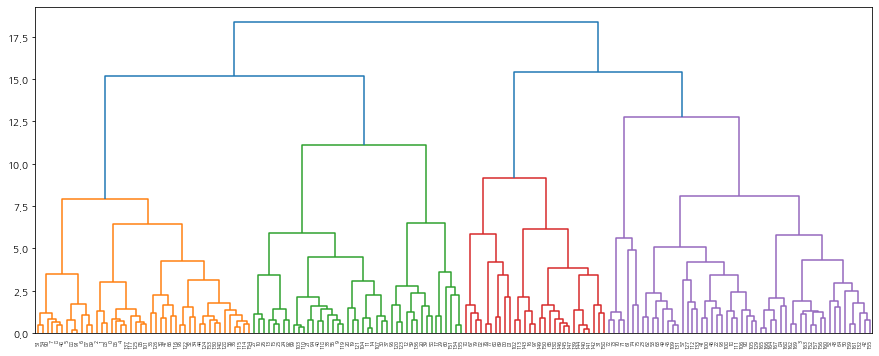

In [134]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from scipy.cluster.hierarchy import dendrogram, linkage

z = linkage(df_cluster0_scaled, 'ward')

plt.figure(figsize = (15,6))
ax = plt.subplot()

ddata = dendrogram(z)

In [135]:
from sklearn import decomposition
from sklearn.cluster import AgglomerativeClustering

pca = decomposition.PCA(n_components = 6).fit(df_cluster0_scaled)
reduced_X = pca.transform(df_cluster0_scaled)

ac = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
ac.fit(reduced_X)
label = ac.labels_

In [136]:
std_df = pd.DataFrame(df_cluster0_scaled, index=df_cluster0.index, columns=df_cluster0.columns)
data = std_df
data.head()

,수분(g),단백질(g),지방(g),탄수화물(g),나트륨(mg),당류(g)
15,0.306076,-0.982767,-0.010939,0.679428,-1.143569,-0.156055
23,0.364442,-1.286843,-0.821683,1.264566,-0.981224,-0.838873
42,0.267166,-0.944757,-1.745818,1.856870,-1.270278,-0.364494
66,-0.063573,-1.379389,0.127020,1.719541,-0.308084,0.127854
68,0.403353,-1.209172,0.057096,0.530158,-0.517945,-0.102148


In [137]:
result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':pca.explained_variance_,
             '기여율':pca.explained_variance_ratio_},
            index=np.array([f"pca{num+1}" for num in range(data.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,1.868177,0.309531,0.309531
pca2,1.583963,0.262441,0.571972
pca3,1.168464,0.193598,0.765571
pca4,0.722634,0.119731,0.885301
pca5,0.386194,0.063987,0.949288
pca6,0.306070,0.050712,1.000000


0번 클러스터에 대한 적절한 pca n_componets 값은 3이다. 이를 이용하여 재클러스터링 진행

In [138]:
from sklearn import decomposition
from sklearn.cluster import AgglomerativeClustering

pca = decomposition.PCA(n_components = 3).fit(df_cluster0_scaled)
reduced_X = pca.transform(df_cluster0_scaled)

ac = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
ac.fit(reduced_X)
label = ac.labels_

In [139]:
print(sum(label == 0))
print(sum(label == 1))
print(sum(label == 2))
print(sum(label == 3))
print(sum(label == 4))
print(sum(label == 5))
print(sum(label == 6))

32
34
10
22
24
24
24


In [140]:
df_cluster['label_hierarchy'] = label

C:\Users\bbiga\anaconda3\envs\leblanc\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [141]:
list(df_cluster[df_cluster['label_hierarchy'] == 3]['식품명'])

['고등어구이_석쇠',
 '닭다리튀김_간장',
 '보쌈/수육_(삼삼한밥상(Ⅶ))돈수육 & 해물냉채',
 '닭튀김(치킨)_(꾸브라꼬 숯불두마리 치킨)후라이드치킨 뼈닭',
 '닭튀김(치킨)_(꾸브라꼬 숯불두마리 치킨)후라이드치킨 순살',
 '두부구이_(삼삼한밥상(Ⅶ))두부구이 & 버섯소스',
 '달걀말이_(삼삼한밥상(Ⅶ))일본식 계란말이',
 '닭튀김_(삼삼한밥상(Ⅶ))유린기',
 '돼지고기_머리고기',
 '전어찜',
 '훈제오리',
 '닭모래집튀김',
 '닭튀김',
 '닭튀김_다리(넓적다리)',
 '닭튀김_다리(아랫다리)',
 '닭튀김_목',
 '닭튀김_살코기',
 '돈가스_돼지등심',
 '돈가스_돼지안심',
 '돈가스_치즈',
 '생선가스',
 '치킨가스']

In [142]:
df_cluster['label_hierachy'] = label + 400
renew_df_hierarchy = pd.concat([renew_df_hierarchy, df_cluster])
renew_df_hierarchy['label_hierachy'].unique()

C:\Users\bbiga\anaconda3\envs\leblanc\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


array([  0,   1,   2,   3,   4, 100, 105, 101, 103, 106, 104, 102, 200,
       202, 204, 201, 203, 208, 207, 206, 205, 302, 305, 306, 303, 301,
       300, 304, 401, 405, 406, 404, 400, 403, 402], dtype=int64)

In [143]:
reset_cluster_number = {'label_hierachy' : {100 : 5, 101 : 6, 102 : 7, 103 : 8, 104 : 9, 105 : 10, 106 : 11, 200 : 12, 201 : 13,
                                            202 : 14, 203 : 15, 204 : 16, 205 : 17, 206 : 18, 207 : 19, 208 : 20, 300 : 21,
                                            301 : 22, 302 : 23, 303 : 24, 304 : 25, 305 : 26, 306 : 27, 400 : 28, 401 : 29, 402 : 30,
                                            403 : 31, 404 : 32, 405 : 33, 406 : 34}}

In [144]:
renew_df_hierarchy = renew_df_hierarchy.replace(reset_cluster_number)

In [145]:
renew_df_hierarchy.reset_index(inplace = True)
renew_df_hierarchy.drop(['index'], axis = 1, inplace = True)
renew_df_hierarchy.head(2)

,식품명,대표식품명,식품대분류명,식품중분류명,에너지(kcal),수분(g),단백질(g),지방(g),회분(g),탄수화물(g),...,리보플라빈(mg),니아신(mg),비타민 C(mg),비타민 D(μg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g),label_kmeans,label_hierachy,label_hierarchy
0,뱅어포구이,뱅어포구이,구이류,해당없음,374,18.4,34.37,15.17,6.96,25.07,...,0.114,0.0,0.00,10.2,469.76,3.00,0.11,4,0,NaN
1,건새우볶음,건새우볶음,볶음류,해당없음,304,28.1,41.55,12.95,12.00,5.40,...,0.350,0.0,12.75,0.0,387.95,1.75,0.10,4,0,NaN


In [146]:
renew_df_hierarchy.head(2)

,식품명,대표식품명,식품대분류명,식품중분류명,에너지(kcal),수분(g),단백질(g),지방(g),회분(g),탄수화물(g),...,리보플라빈(mg),니아신(mg),비타민 C(mg),비타민 D(μg),콜레스테롤(mg),포화지방산(g),트랜스지방산(g),label_kmeans,label_hierachy,label_hierarchy
0,뱅어포구이,뱅어포구이,구이류,해당없음,374,18.4,34.37,15.17,6.96,25.07,...,0.114,0.0,0.00,10.2,469.76,3.00,0.11,4,0,NaN
1,건새우볶음,건새우볶음,볶음류,해당없음,304,28.1,41.55,12.95,12.00,5.40,...,0.350,0.0,12.75,0.0,387.95,1.75,0.10,4,0,NaN


In [147]:
renew_df_hierarchy = renew_df_hierarchy[['식품명', '대표식품명', '식품대분류명', '식품중분류명', 'label_hierachy']]

In [148]:
renew_df_hierarchy.rename(columns = {'label_hierachy' : 'label_hierarchy'}, inplace = True)
renew_df_hierarchy.head(2)

,식품명,대표식품명,식품대분류명,식품중분류명,label_hierarchy
0,뱅어포구이,뱅어포구이,구이류,해당없음,0
1,건새우볶음,건새우볶음,볶음류,해당없음,0


In [149]:
renew_df_hierarchy.to_csv('renew_labeling_of_hierarchy.csv')

In [150]:
len(renew_df_hierarchy) - len(renew_df_hierarchy['식품명'].unique())

46

### 같은 이름을 가진 음식끼리의 클러스터 확인 후 둘 중 하나 빼기

In [151]:
len(renew_df_hierarchy['식품명'].unique())

775

In [152]:
ls = list(renew_df_hierarchy['식품명'])

for i in list(renew_df_hierarchy['식품명'].unique()) : 
    if i in ls : 
        ls.remove(i)
ls

['멸치볶음_풋고추',
 '김밥_김치',
 '김밥_쇠고기',
 '김밥_참치',
 '덮밥_불고기',
 '볶음밥_새우',
 '비빔밥',
 '삼각김밥_참치마요네즈',
 '자장밥',
 '초밥_유부초밥',
 '간자장',
 '자장면',
 '청국장찌개',
 '국수_막국수',
 '떡만두국',
 '우동_일식',
 '스프_양송이',
 '감자국',
 '곰탕',
 '김치국',
 '된장국_시래기',
 '매운탕_대구',
 '무국_쇠고기',
 '미역국_쇠고기',
 '순대국',
 '해장국_뼈다귀',
 '해장국_선지',
 '김치찌개_햄',
 '부대찌개',
 '샤브샤브_쇠고기',
 '추어탕',
 '아귀찜',
 '볶음밥_김치',
 '만두_고기만두',
 '만두_김치만두',
 '연근조림',
 '콩조림(콩자반)',
 '덮밥_돼지고기(제육)',
 '초밥_모듬',
 '갈비찜_쇠고기',
 '순대',
 '족발',
 '채소전',
 '소시지볶음',
 '장조림_쇠고기_메추리알',
 '샌드위치_참치']

In [153]:
len(ls)

46

In [154]:
ls[45]

'샌드위치_참치'

In [155]:
#두 개씩 겹치는 것은 있으나 세 개 이상의 항목이 서로 겹치지 않는 것을 확인하였다.
#ls에 들어있는 식품을 각각 확인하여 어울리지 않는 클러스터에 있다면 제거하기

label = renew_df_hierarchy[renew_df_hierarchy['식품명'] == ls[45]]['label_hierarchy']
label

805    29
813    33
Name: label_hierarchy, dtype: int64

In [156]:
list(renew_df_hierarchy[renew_df_hierarchy['label_hierarchy'] == label.unique()[0]]['식품명'])

['덮밥_돼지고기(제육)',
 '볶음밥_쇠고기',
 '초밥_모듬',
 '만두_물만두',
 '김치찌개_꽁치',
 '된장찌개_달래',
 '오리탕',
 '달걀찜_우유',
 '불고기_오리',
 '버섯전_표고버섯',
 '돼지고기볶음_김치',
 '마파두부',
 '삼겹살볶음_묵은지',
 '쇠고기볶음_버섯',
 '고등어조림',
 '닭조림_고추장',
 '삼치조림',
 '덮밥_장어',
 '스파게티_크림소스',
 '스파게티_해물_크림소스',
 '곰치국',
 '매운탕_광어',
 '매운탕_조기',
 '꽁치찌개',
 '매운탕_우럭',
 '순대',
 '고추전',
 '굴전',
 '녹두빈대떡',
 '채소전',
 '화양적',
 '조기조림',
 '고추튀김',
 '샌드위치_참치']

In [157]:
list(renew_df_hierarchy[renew_df_hierarchy['label_hierarchy'] == label.unique()[1]]['식품명'])

['만두_군만두',
 '완자전_해물',
 '소시지볶음',
 '어묵볶음',
 '미트볼조림',
 '초밥_장어',
 '꼬치구이_닭고기',
 '닭튀김(치킨)_양념',
 '소시지볶음',
 '샌드위치_닭가슴살',
 '피자_콤비네이션피자',
 '햄버거',
 '햄버거_불고기버거',
 '샌드위치_닭고기',
 '샌드위치_생선',
 '샌드위치_소고기',
 '샌드위치_참치',
 '샌드위치_햄_치즈_채소',
 '피자_불고기피자',
 '피자_치즈피자',
 '피자_페퍼로니피자',
 '피자_포테이토피자',
 '햄버거_소고기패티',
 '햄버거_소고기패티_토마토_양상추']

### 중복은 따로 모두 제거하였다. 중복된 음식명이 있는지 다시 한 번 확인해보자

In [158]:
label_df = pd.read_csv(path + 'label_hierarchy_post_processing2.csv', encoding = 'cp949')
label_df.head()

,식품명,대표식품명,식품대분류명,식품중분류명,label_hierarchy,음식분류,국물여부,맵기여부
0,건새우볶음,건새우볶음,볶음류,해당없음,0,한식,0,0
1,멸치볶음,멸치볶음,볶음류,해당없음,0,한식,0,0
2,멸치볶음_견과류,멸치볶음,볶음류,견과류,0,한식,0,0
3,멸치볶음_꽈리고추,멸치볶음,볶음류,꽈리고추,0,한식,0,0
4,멸치볶음_마늘쫑,멸치볶음,볶음류,마늘쫑,0,한식,0,0


In [159]:
len(label_df['식품명'].unique())

654

In [160]:
len(label_df)

654

In [161]:
ls = list(label_df['식품명'])

for i in list(label_df['식품명'].unique()) : 
    if i in ls : 
        ls.remove(i)
ls

[]

중복 처리가 완료되었다.

### 0~34로 나눈 label_hierarchy에 대한 big_label 병합을 진행하자

In [162]:
sub2big_transform = [( 0, 1), ( 1, 3), ( 2, 7), ( 3, 8), ( 4, 5), ( 5, 2), ( 6, 2), ( 7, 2), ( 8, 2), ( 9, 2), (10, 2), (11, 2), (12, 6), (13, 6), (14, 6), (15, 6), (16, 6), (17, 6), (18, 6), (19, 6), (20, 6), (21, 4), (22, 4), (23, 4), (24, 4), (25, 4), (26, 4), (27, 4), (28, 0), (29, 0), (30, 0), (31, 0), (32, 0), (33, 0), (34, 0)]

transform_hashmap = {}
for s, b in sub2big_transform:
  transform_hashmap[s] = b

big_big_label = []
for s in label_df['label_hierarchy']:
  big_big_label.append(transform_hashmap[s])

label_df['big_big_label'] = big_big_label
label_df = label_df[['식품명', '대표식품명', '식품대분류명', '식품중분류명', 'big_big_label', 'label_hierarchy', '음식분류', '국물여부', '맵기여부']]
label_df.head()

,식품명,대표식품명,식품대분류명,식품중분류명,big_big_label,label_hierarchy,음식분류,국물여부,맵기여부
0,건새우볶음,건새우볶음,볶음류,해당없음,1,0,한식,0,0
1,멸치볶음,멸치볶음,볶음류,해당없음,1,0,한식,0,0
2,멸치볶음_견과류,멸치볶음,볶음류,견과류,1,0,한식,0,0
3,멸치볶음_꽈리고추,멸치볶음,볶음류,꽈리고추,1,0,한식,0,0
4,멸치볶음_마늘쫑,멸치볶음,볶음류,마늘쫑,1,0,한식,0,0


# 최종 선택된 데이터는 어떤 형태일까?
사용자가 어떤 column을 선택해야, 가장 좋은 분할(모든 분할의 크기가 비슷한 분할)을 만들 수 있는지 확인한다.

In [163]:
data = pd.read_csv(path + 'big_big_label.csv', encoding = 'cp949')
data.head()

,식품명,대표식품명,식품대분류명,식품중분류명,big_big_label,label_hierarchy,음식분류,국물여부,맵기여부
0,건새우볶음,건새우볶음,볶음류,해당없음,1,0,한식,0,0
1,멸치볶음,멸치볶음,볶음류,해당없음,1,0,한식,0,0
2,멸치볶음_견과류,멸치볶음,볶음류,견과류,1,0,한식,0,0
3,멸치볶음_꽈리고추,멸치볶음,볶음류,꽈리고추,1,0,한식,0,0
4,멸치볶음_마늘쫑,멸치볶음,볶음류,마늘쫑,1,0,한식,0,0


In [164]:
count = 0
max_count = 0
data_count = 0
data_over10s = []

def nextPermutation(df, tags, tag_index, selected, func):
  if tag_index == len(tags):
    func(df, tags, selected)
    return

  for value in sorted(df[tags[tag_index]].unique()):
    selected.append(value)
    nextPermutation(df, tags, tag_index + 1, selected, func)
    selected.pop(-1)

def printDf(df, tags, selected):
  global count
  global data_count
  global max_count
  global data_over10s

  cond = df[tags[0]] == selected[0]
  for i in range(1, len(tags)):
    cond &= df[tags[i]] == selected[i]

  cnt = np.count_nonzero(cond.astype('int'))
  if cnt > 0:
    data_count += cnt
    max_count = max(max_count, cnt)
    print(selected, 'count:', cnt)
    count += 1
  if cnt >= 10:
    data_over10s.append(tuple(selected))

## 사용자가 선택할 수 있는 경우의 수 별 출력되는 음식의 개수 구하기

# 'big_big_label', '맵기여부', '음식분류', '국물여부', '대표식품명'
grouping_tag = ['label_hierarchy', '음식분류', '국물여부', '맵기여부']

nextPermutation(data, grouping_tag, 0, [], printDf)
print('max count:', max_count)
print('valid group count:', count)

possible_group_count = 1
for tag in grouping_tag:
  possible_group_count *= len(data[tag].unique())
print('possible group count:', possible_group_count)

[0, '한식', 0, 0] count: 11
[1, '일식', 0, 0] count: 1
[1, '한식', 0, 0] count: 4
[1, '한식', 0, 1] count: 1
[2, '한식', 0, 0] count: 3
[2, '한식', 0, 1] count: 1
[3, '한식', 1, 0] count: 3
[4, '패스트푸드', 0, 0] count: 1
[5, '분식', 0, 0] count: 6
[5, '분식', 0, 1] count: 2
[5, '분식', 1, 1] count: 3
[5, '양식', 0, 0] count: 1
[5, '일식', 0, 0] count: 5
[5, '중식', 0, 0] count: 7
[5, '패스트푸드', 0, 0] count: 2
[5, '패스트푸드', 0, 1] count: 1
[5, '패스트푸드', 1, 1] count: 5
[5, '한식', 0, 0] count: 36
[5, '한식', 0, 1] count: 1
[6, '양식', 1, 0] count: 1
[6, '중식', 0, 0] count: 5
[6, '한식', 0, 0] count: 28
[6, '한식', 0, 1] count: 3
[6, '한식', 1, 0] count: 1
[7, '분식', 0, 1] count: 3
[7, '분식', 1, 1] count: 1
[7, '양식', 0, 0] count: 8
[7, '한식', 0, 0] count: 10
[8, '분식', 0, 1] count: 1
[8, '양식', 0, 0] count: 2
[8, '일식', 0, 0] count: 10
[8, '중식', 0, 0] count: 3
[8, '한식', 0, 0] count: 11
[8, '한식', 0, 1] count: 1
[9, '분식', 0, 0] count: 1
[9, '양식', 0, 0] count: 1
[9, '일식', 0, 0] count: 1
[9, '중식', 0, 0] count: 4
[9, '한식', 0, 0] count: 21
[9, '한

In [166]:
## 사용자가 선택할 수 있는 대표식품명 출력해보기

used_data = []
for selected in data_over10s:
  cond = data[grouping_tag[0]] == selected[0]
  for i in range(1, len(grouping_tag)):
    cond &= data[grouping_tag[i]] == selected[i]

  food_names = list(data[cond]['대표식품명'].unique())
  used_data.extend(food_names)

used_data = list(set(used_data))
print(len(data_over10s))
print(len(used_data))
print(used_data)

21
242
['임연수구이', '보리밥', '만두국', '참치구이', '오곡밥', '콩나물국', '돼지고기', '된장국', '가자미구이', '올갱이국수', '수육', '브로콜리볶음', '순대국', '팥죽', '흰죽(쌀죽)', '두부전골', '조기찜', '아구탕', '두부부침', '쇠고기산적', '부대찌개', '오징어순대', '매운탕', '돼지고기볶음', '돼지갈비', '된장찌개', '삼겹살볶음', '생선전', '탕국', '고등어조림', '동태찜', '오리고기구이', '도미구이', '새우탕', '고추조림', '건새우볶음', '호박전', '돼지고기볶음(제육볶음)', '비빔밥', '돼지갈비찜', '잡탕밥', '감자조림', '무조림', '오징어찌개', '병어찜', '버섯구이표고버섯', '콩비지찌개', '어묵조림', '육개장', '가오리찜', '호박부침개', '잡채', '동태국', '잡곡밥', '콩나물밥', '청국장찌개', '붕어찜', '김밥', '곱창전골', '햄부침', '오징어볶음', '닭곰탕', '연어롤', '모듬튀김', '무국', '김치볶음', '완자전', '도미찜', '두부전', '마늘쫑볶음', '설렁탕', '황태해장국', '갈비탕', '초밥', '꼬리곰탕', '비빕밤', '오징어국', '버섯구이', '차조밥', '재첩국', '깨죽', '닭볶음', '멸치조림', '두부조림', '두부찜', '불고기', '갈비구이', '깻잎찜', '달걀부침(달걀후라이)', '주먹밥', '어묵국', '소시지볶음', '두부김치', '버섯볶음', '오리죽', '두부찌개', '대구찜', '조개구이', '닭찜', '멸치볶음', '묵밥', '흰게살죽', '추어탕', '냉면', '햄볶음', '생성전', '꽈리고추찜', '쇠고기볶음', '달걀말이', '조기조림', '김치찌개', '삼치구이', '떡갈비', '죽순볶음', '육탕', '삼계탕', '수수밥', '토란국', '콩국수', '부추전', '매생이국', '칼국수', '북어찜', '메밀전', '달걀찜', '햄버그스테이크', '묵국', '충무김밥

태그 별 가능한 그룹수, 유효 그룹수(음식 개수가 0이 아닌 그룹 개수)

('label_hierarchy', '맵기여부')
valid group count: 50
possible group count: 70

('label_hierarchy', '국물여부')
valid group count: 48
possible group count: 70

('label_hierarchy', '음식분류')
valid group count: 95
possible group count: 245

('label_hierarchy', '음식분류', '맵기여부')
valid group count: 110
possible group count: 490

('label_hierarchy', '음식분류', '국물여부')
valid group count: 111
possible group count: 490

('label_hierarchy', '국물여부', '맵기여부')
valid group count: 64
possible group count: 140

('label_hierarchy', '음식분류', '국물여부', '맵기여부')
valid group count: 126
possible group count: 980

따라서 'big_big_label', 'label_hierarchy', '음식분류', '국물여부', '맵기여부' 로 사용자가 선택할 수 있도록하고, 추가적으로 음식숫자가 많은 항목에 대해서 '대표식품명'으로 한번 더 분류할 수 있도록 합니다.